# FIR Filter Parameters

In [1]:
import numpy as np 
from numpy.fft import fft,ifft,fftshift
import matplotlib.pyplot as plt


In [2]:
# Anfangs werte noch variabel machen 
delays = [3,5,2]
ampl = [0.2,0.5,0.8]

# Dealy Window


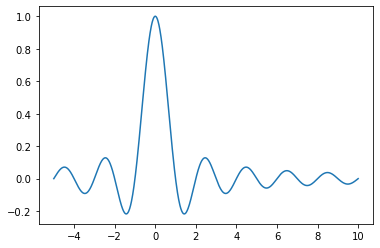

In [3]:
d =0
k = np.linspace(-5,10,1000)
h_ideal = np.sinc(k-d)
plt.plot(k,h_ideal)
plt.show()



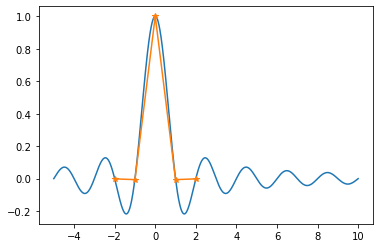

In [4]:
n = 4.5
window_sample= np.arange(np.round(d-(n-1)/2),np.round(d+(n+1)/2))
window = []
for ws in window_sample:  
    idx = (np.abs(k-ws)).argmin()
    window.append(idx)
    
plt.plot(k,h_ideal)
plt.plot(window_sample,h_ideal[window],"-*")
plt.show()

# FIR

In [5]:
delay = 3
amplitude = 1

d_int = int(np.floor(delay))
#d_frac = delay - d_int

h_int = np.concatenate([np.zeros(d_int-1), [amplitude], np.zeros(3)])

In [6]:
#H_int = fft(h_int)
#h = ifft(H_int)

<StemContainer object of 3 artists>

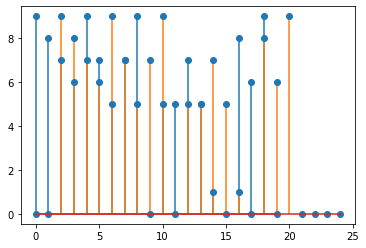

In [7]:
test = np.random.randint(0, 10, size = 20)# Signal

y = np.convolve(test.real, h_int)#Faltung

plt.stem(test, linefmt="C0-")
plt.stem(y, linefmt='C1-')

In [8]:
test

array([9, 8, 7, 6, 9, 7, 5, 7, 9, 0, 5, 5, 7, 5, 1, 0, 8, 6, 9, 0])

In [9]:
h_int

array([0., 0., 1., 0., 0., 0.])

In [10]:
y

array([0., 0., 9., 8., 7., 6., 9., 7., 5., 7., 9., 0., 5., 5., 7., 5., 1.,
       0., 8., 6., 9., 0., 0., 0., 0.])

# FIR mit Delay 


Tap with amplitude=1, delay=5.2
Creating filter of order N=11.0
[ 1.          0.04454711 -0.05846808  0.08504448 -0.15591488  0.93548928
  0.23387232 -0.10394325  0.06682066 -0.04923628  0.03897872 -0.03225825]


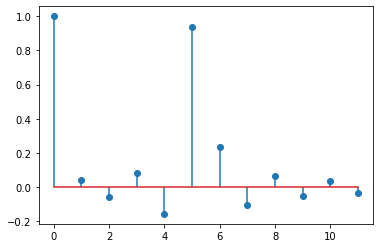

In [11]:

delay = 5.2
ampl = 1
print(f"Tap with amplitude={ampl}, delay={delay}")
    
order = 2 * np.floor(delay) + 1 #N
print(f"Creating filter of order N={order}")

skip = np.floor(delay) - (order - 1) / 2 #M
assert skip >= 0

samples = np.arange(0, order+1)

h = ampl*(np.sinc(samples-delay)) #sinc

h[0] = 1

print(h)

plt.stem(samples, h)
plt.show()


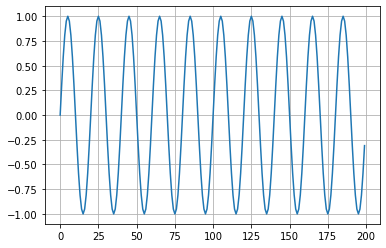

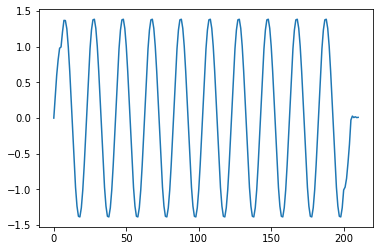

In [12]:
t = np.arange(200)

signal = np.sin(2 * np.pi * t * 0.05)

signal_shifted = np.convolve(h, signal, mode='full')

plt.plot(t, signal)
plt.grid(True)
plt.show()
plt.plot(signal_shifted)



Tap with amplitude=[4, 1], delay=[5, 6.2]
14
[ 1.55926873e-16 -1.55926873e-16  1.55926873e-16 -1.55926873e-16
  1.55926873e-16  4.00000000e+00  1.55926873e-16 -1.55926873e-16
  1.55926873e-16 -1.55926873e-16  1.55926873e-16 -1.55926873e-16
  0.00000000e+00  0.00000000e+00]
[ 0.03017707 -0.03598036  0.04454711 -0.05846808  0.08504448 -0.15591488
  0.93548928  0.23387232 -0.10394325  0.06682066 -0.04923628  0.03897872
 -0.03225825  0.02751439]
[ 1.         -0.03598036  0.04454711 -0.05846808  0.08504448  3.84408512
  0.93548928  0.23387232 -0.10394325  0.06682066 -0.04923628  0.03897872
 -0.03225825  0.02751439]


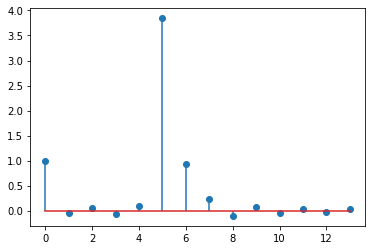

In [13]:

delay = [5,6.2]
ampl = [4,1]
print(f"Tap with amplitude={ampl}, delay={delay}")

max_order = 2 * np.floor(np.max(delay)) + 1
max_samples = np.arange(0, max_order +1) 
max_len = len(max_samples)
print(max_len)

sum_x = np.zeros(int(max_len))

for (a,d) in zip(ampl,delay):
    
    order = 2 * np.floor(d) + 1
    
    skip = np.floor(d) - (order - 1) / 2 #M sollte immer 0 sein 
    assert skip >= 0

    samples = np.arange(0, order+1 ) 

    h = a*(np.sinc(samples-d)) #sinc
    h_len = np.concatenate([h, np.zeros(max_len-len(h))])
    print(h_len)
    sum_x += h_len
    

sum_x[0] = 1
print(sum_x)



plt.stem(max_samples, sum_x)
plt.show()


In [14]:
delay = [5,6]
np.max(delay)

6